In [0]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

(x_train, y_train), (x_test, y_test) = mnist.load_data()

(60000, 28, 28)
(60000,)


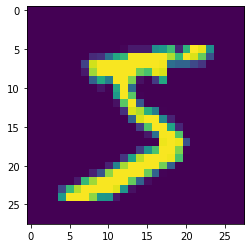

In [0]:
print (x_train.shape)
print (y_train.shape)

plt.imshow(x_train[0])

In [0]:

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
#hidden layer added
encoded = Dense(500, activation='relu')(encoded)
encoded = Dense(500, activation='relu')(encoded)
encoded = Dense(500, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# plt.imshow(x_train[0]*255)
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 192us/step - loss: 0.3229 - val_loss: 0.4708
Epoch 2/10
60000/60000 [==============================] - 11s 182us/step - loss: 0.2462 - val_loss: 0.3372
Epoch 3/10
60000/60000 [==============================] - 11s 190us/step - loss: 0.2181 - val_loss: 0.2498
Epoch 4/10
60000/60000 [==============================] - 12s 192us/step - loss: 0.1934 - val_loss: 0.1791
Epoch 5/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.1778 - val_loss: 0.1354
Epoch 6/10
60000/60000 [==============================] - 12s 192us/step - loss: 0.1673 - val_loss: 0.1141
Epoch 7/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.1587 - val_loss: 0.0810
Epoch 8/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.1522 - val_loss: 0.0524
Epoch 9/10
60000/60000 [==============================] - 11s 192us/step - loss: 0.1469 - val_

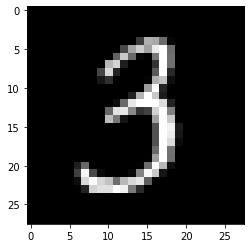

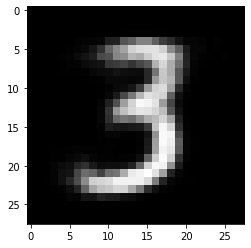

In [0]:
#Task 2
for i in range(1098,1099):
  (x_train, y_train), (x_test, y_test) = mnist.load_data()
  plt.imshow(x_test[i].reshape(28,28),'gray')
  #plotting original image
  plt.show()
  x_test = x_test.astype('float32') / 255.
  #getting ready input data
  x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
  inp= np.expand_dims(x_test[i],axis=0)
  # predicticting using auto encoder
  ans = autoencoder.predict(inp)
  #plotting output image
  plt.imshow(ans.reshape(28,28),'gray')
  plt.show()

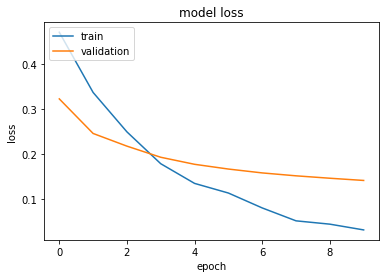

In [0]:
history = autoencoder.history


plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()